Imagine we have imaginary data on dogs and horses with their heights and weights

The algorithm will classify either a dog or horse based on the closeness of that observation to previous data points

The training algorithm stores the data

The prediction algorithm calculates the distance from x  to all points in your data, sorts the points based on increasing distance from x, and predicts the majority label of the 'k' closest points

Choosing a 'k' will affect the class that a new point is assigned to

Pros:
-Simple 
-Training is easy
-Works with any number of classes
-Easy to add more data
-Few parameters (K and Distance Metric)

Cons:
-High Prediction Cost that worsens with larger data sets
-Not good with high dimension data
-Categorical features don't work well


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\casey\\Downloads\\Python-Data-Science-and-Machine-Learning-Bootcamp-master\\Machine Learning Sections\\K-Nearest-Neighbors')

In [3]:
df = pd.read_csv('Classified Data', index_col = 0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
# similar to potential job interview tasks, we don't know what these columns mean but we need to predict target classes

# need to scale data before implementing KNN (similar to clustering - bigger distances affect results)

from sklearn.preprocessing import StandardScaler

In [6]:
# scaler is set up similar to a predictive model

scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# need to now apply a transform method and pass in the dataset again

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [9]:
print(scaled_features) # good

[[-0.12354188  0.18590747 -0.91343069 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333 ... -0.20224031 -1.82805088
   0.63675862]
 [-0.78870217  0.33931821  0.30151137 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 0.64177714 -0.51308341 -0.17920486 ... -2.36249443 -0.81426092
   0.11159651]
 [ 0.46707241 -0.98278576 -1.46519359 ... -0.03677699  0.40602453
  -0.85567   ]
 [-0.38765353 -0.59589427 -1.4313981  ... -0.56778932  0.3369971
   0.01034996]]


In [10]:
# lets make a new dataset now with the scaled variables

df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
# looks good - lets move onto modeling

from sklearn.cross_validation import train_test_split

In [13]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# initialize knn object with only 1 neighbor (k = 1)

knn = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, pred))

[[151   8]
 [ 15 126]]


In [20]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [23]:
# k = 1 did pretty well, but we may be able to make a better model

# lets explore if we can find a better k value with an elbow plot

# initialize with an empty list then use a for loop to populate values for each number in range

# np.mean(pred_i != y_test) is the average error rate for the classifier

error_rate = []

for i in range(1, 20):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

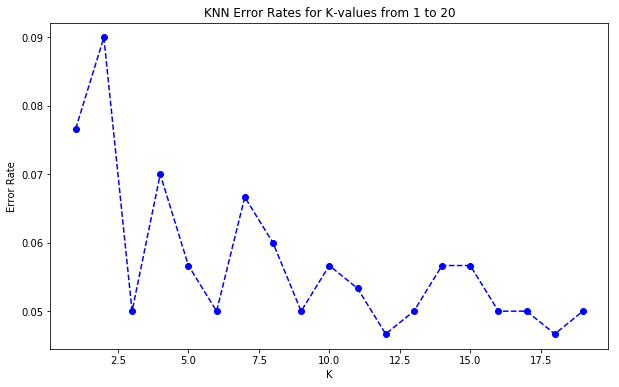

In [27]:
# create elbow plot

plt.figure(figsize = (10, 6))

plt.plot(range(1, 20), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')

plt.title('KNN Error Rates for K-values from 1 to 20')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
# Error rate is lowest at k = 18

# Rebuild model to see if this performs better on test data

knn = KNeighborsClassifier(n_neighbors = 18)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [31]:
pred = knn.predict(X_test)

In [33]:
# slightly better now - model accuracy increased by ~3% on test data

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       159
          1       0.97      0.93      0.95       141

avg / total       0.95      0.95      0.95       300

